In [1]:
#Libraries used

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import cv2

In [ ]:
#To capture the images using OPENCV library

In [42]:

vid = cv2.VideoCapture(0)
c = 0

while True:
    suc, img = vid.read()
    
    # Draw a rectangle on the image
    cv2.rectangle(img, (240, 100), (480, 450), (1, 1, 1), 1)
    
    # Crop the image from the rectangle
    crop_img = img[100:450, 240:480]
    
    # Display the captured image and the cropped image
    cv2.imshow("capture", img)
    cv2.imshow("cropped", crop_img)
    
    # Check if 's' key is pressed to save the cropped image
    if cv2.waitKey(1) & 0xFF == ord('s'):
        # Save the cropped image with a unique name
        cv2.imwrite(r"D:\Images\Aditya\Aditya{}.jpg".format(c), crop_img)
        print("Saved")
        c += 1
    
    # Check if 'q' key is pressed to quit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):    
        break

# Release the video capture and close all OpenCV windows
vid.release()
cv2.destroyAllWindows()


Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved


In [43]:
os.listdir(r"D:\Images")  #to get the list of people we collected

['Aditya', 'Nikhil', 'Sai', 'Santosh']

In [44]:
#to get in to the folders of the respective folders and read them

features=[]
class_label=[]
c=0
for folder in os.listdir(r"D:\Images"):
    for images in os.listdir(r"D:\Images\{}".format(folder)):
        img=cv2.imread(r"D:\Images\{}\{}".format(folder,images))
        features.append(cv2.resize(img,(100,100)).flatten())
        class_label.append(c)
    c+=1

In [45]:
len(features)


517

In [47]:
len(class_label)

517

In [103]:
#to get the Names assigned with the class lables as dictionary

d = {}
c=0
for i in os.listdir(r"D:\Images"):
    d[c]=i
    c+=1
    
d

{0: 'Aditya', 1: 'Nikhil', 2: 'Sai', 3: 'Santosh'}

In [52]:
data=pd.DataFrame(features)  #creating Data Frame

In [53]:
data=data.astype(np.uint8) # use it if all the columns are not havinf uint8 dtype

In [104]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,96,98,102,138,143,146,132,138,141,135,...,248,185,194,203,175,184,193,190,199,207
1,95,98,99,138,141,145,135,139,144,136,...,239,203,212,222,184,190,198,212,217,220
2,97,100,101,138,142,143,138,143,146,138,...,243,194,201,210,200,206,217,212,218,229
3,100,101,101,143,145,145,140,144,143,141,...,188,173,185,198,164,174,191,131,140,160
4,99,100,100,144,146,146,139,144,143,139,...,189,171,185,199,168,178,196,131,138,158


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#to split the total data as train and test

x_train,x_test,y_train,y_test = train_test_split(features,class_label,test_size=0.15,stratify=class_label)

In [58]:
#to split the train data as final train and cross validation data

xf_train,x_cv,yf_train,y_cv = train_test_split(x_train,y_train,test_size=0.15,stratify=y_train)

In [59]:
len(xf_train)

373

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
#Model building

knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(xf_train,yf_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [89]:
#finding accuracy for cv data

predicted_c1 = model.predict(x_cv)

In [91]:
accuracy_score(y_cv,predicted_c1)*100

100.0

In [92]:
#finding accuracy for test data

predict_test = model.predict(x_test)

In [93]:
accuracy_score(y_test,predict_test)*100

98.71794871794873

In [68]:
tr_err = []
cv_err = []
for k in range(1,185,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(xf_train,yf_train)

    # training error
    predicted_c1 = model.predict(xf_train)
    tr_err.append(1-accuracy_score(yf_train,predicted_c1))

    # cv error
    predict_test = model.predict(x_cv)
    cv_err.append(1-accuracy_score(y_cv,predict_test))

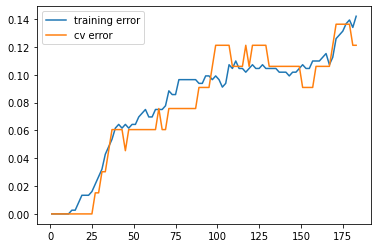

In [69]:
#plotting the line plot between training error and cv error to finmd the best k-value to use in our model
#k-value is where min value of both cv error and test error meets 

plt.plot(range(1,185,2),tr_err,label="training error")
plt.plot(range(1,185,2),cv_err,label="cv error")
plt.legend()

In [94]:
model


KNeighborsClassifier()

In [ ]:
from datetime import datetime

In [95]:
#to get the time in the image

now = datetime.now()

now
current_time = now.strftime("%H:%M:%S")
current_time

'11:47:54'

In [ ]:
#to open the camera to predict the face which is placed in the rectangle box

In [107]:
vid=cv2.VideoCapture(0)
while True:
    suc,img=vid.read()
    
    now = datetime.now()

    
    cv2.rectangle(img,(240,100),(480,450),(1,1,1),1)
    
    crop_img=img[100:450,240:480]
    
    xq=cv2.resize(crop_img,(100,100)).flatten() # pre-processing your query point
    xq=xq.reshape((1,30000)) # pre-processing your query point
    
    y_i=model.predict(xq)
    
    cv2.putText(img,now.strftime("%H:%M:%S"),(10,20),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
    
    cv2.putText(img,"Face detection",(10,90),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,255),1)
    
    if y_i[0]==0:
        cv2.putText(img,"Aditya",(100,150),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
        cv2.imshow("capture",img)
        
    elif y_i[0]==1:
        cv2.putText(img,"Nikhil",(100,150),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
        cv2.imshow("capture",img)
        
    elif y_i[0]==2:
        cv2.putText(img,"Sai",(100,150),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
        cv2.imshow("capture",img)
    
    elif y_i[0]==3:
        cv2.putText(img,"Santosh",(100,150),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
        cv2.imshow("capture",img)
    
    
    if cv2.waitKey(1) & 255 == ord("q"):
        break
    
cv2.destroyAllWindows()